## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

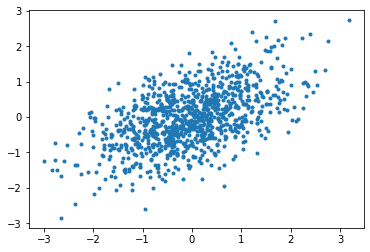

In [3]:
plt.clf()
plt.plot(x_train, y_train, '.')
plt.show()

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

MSE loss is 0.4708945587604487
MAE loss is 0.5492653266059624


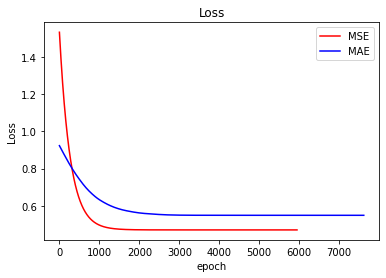

MSE beta_0 is -0.0012762766165574284	 beta_1 is 0.452720248401306
MAE beta_0 is -0.03806718075091316	 beta_1 is 0.4350270954026319


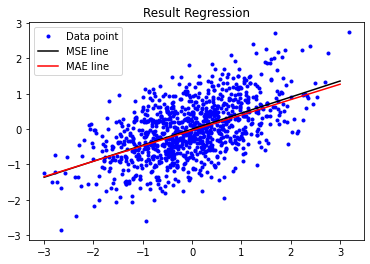

In [5]:
# Initial weight
w0_MSE = np.random.normal(0, 1)
w1_MSE = np.random.normal(0, 1)
MSE_loss_list = []

w0_MAE = np.random.normal(0, 1)
w1_MAE = np.random.normal(0, 1)
MAE_loss_list = []

# Setting some parameters
lr = 1e-3
diff = 1e10
threshold = 1e-12

# Start training by using MSE
while (diff > threshold):
    # Predict result by current parameters
    y_pred_MSE = w0_MSE + w1_MSE*x_train
    # Calculate loss by MSE
    MSE_loss = np.sum((y_train-y_pred_MSE)**2) / len(x_train)
    MSE_loss_list.append(MSE_loss)
    if len(MSE_loss_list) == 1:
        diff = MSE_loss_list[-1]
    else:
        diff = abs(MSE_loss_list[-1] - MSE_loss_list[-2])
    # Updatae modle by using gradient descent
    # Partial derivative result is in the report
    w1_MSE = w1_MSE - lr * 2 * np.sum(w0_MSE*x_train + w1_MSE*x_train*x_train - x_train*y_train) / len(x_train)
    w0_MSE = w0_MSE - lr * 2 * np.sum(y_pred_MSE - y_train) / len(x_train)


# Start training by using MAE
diff = 1e10
while (diff > threshold):
    # Predict result by current parameters
    y_pred_MAE = w0_MAE + w1_MAE*x_train
    # Calculate loss by MAE
    MAE_loss = np.sum(abs(y_train-y_pred_MAE)) / len(x_train)
    MAE_loss_list.append(MAE_loss)

    if len(MAE_loss_list) == 1:
        diff = MAE_loss_list[-1]
    else:
        diff = abs(MAE_loss_list[-1] - MAE_loss_list[-2])

    # Updatae modle by using gradient descent
    # Partial derivative result is in the report
    Gradient_w0 = np.ones((len(x_train), 1))
    Gradient_w0[y_pred_MAE < y_train] = -1

    Gradient_w1 = np.copy(x_train)
    Gradient_w1[y_pred_MAE < y_train] = -Gradient_w1[y_pred_MAE < y_train]

    w0_MAE = w0_MAE - lr * np.sum(Gradient_w0) / len(x_train)
    w1_MAE = w1_MAE - lr * np.sum(Gradient_w1) / len(x_train)

print(f"MSE loss is {MSE_loss}\nMAE loss is {MAE_loss}")
plt.clf()
plt.plot(MSE_loss_list, 'r', label='MSE')
plt.plot(MAE_loss_list, 'b', label='MAE')
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

print(f"MSE beta_0 is {w0_MSE}\t beta_1 is {w1_MSE}")
print(f"MAE beta_0 is {w0_MAE}\t beta_1 is {w1_MAE}")
plt.clf()
plt.plot(x_train, y_train, '.', label="Data point", color='blue')
plt.title("Result Regression")
x = np.linspace(-3, 3, 100)
y1 = w0_MSE + w1_MSE * x
y2 = w0_MAE + w1_MAE * x
plt.plot(x, y1, 'black', label='MSE line')
plt.plot(x, y2, "red", label="MAE line")
plt.legend()
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [6]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [7]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

MSE loss in Testing is 0.49090350083705264
MAE loss in Testing is 0.563913393164845


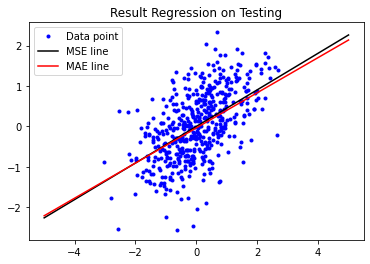

In [8]:
y_pred_MSE_testing = w0_MSE + w1_MSE * x_test
y_pred_MAE_testing = w0_MAE + w1_MAE * x_test

MSE_loss_testing = np.sum((y_test-y_pred_MSE_testing)**2) / len(x_test)
MAE_loss_testing = np.sum(abs(y_test-y_pred_MAE_testing)) / len(x_test)

print(f"MSE loss in Testing is {MSE_loss_testing}\nMAE loss in Testing is {MAE_loss_testing}")

plt.clf()
plt.plot(x_test, y_test, '.', label="Data point", color='blue')
plt.title("Result Regression on Testing")
x = np.linspace(-5, 5, 100)
y1 = w0_MSE + w1_MSE * x
y2 = w0_MAE + w1_MAE * x
plt.plot(x, y1, 'black', label='MSE line')
plt.plot(x, y2, "red", label="MAE line")
plt.legend()
plt.show()